In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset/81_cat_1version_stop_words.csv')

In [3]:
df = df.reset_index(drop=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])

In [5]:
df

,Unnamed: 0,id,name,description,response,natasha_response,class,natasha_response_stopwords
0,0,13246,Финансовый аналитик,обязанности организовывает управление движение...,организовывает управление движением финансовых...,организовывать управление движение финансовый ...,0,организовывать управление движение финансовый ...
1,1,14266,Финансовый менеджер,обязанности составление бюджета доходов бюджет...,"Составление бюджета доходов и расходов, контро...","составление бюджет доход и расход , контроль и...",0,составление бюджет доход расход контроль испол...
2,2,14674,Финансовый аналитик,уважаемый кандидат компания alem sauda ltd рад...,Разработка и внедрение внутренних регламентиру...,разработка и внедрение внутренний регламентиро...,0,разработка внедрение внутренний регламентирова...
3,3,15042,Старший финансовый аналитик,требования высшее финансовое экономическое обр...,Осуществлять работу экономическому планировани...,осуществлять работа экономический планирование...,0,осуществлять работа экономический планирование...
4,4,16179,Финансовый аналитик на проект Sandyq,обязанности формирование управленческой отчетн...,"формирование управленческой отчетности, анализ...","формирование управленческий отчетность , анали...",0,формирование управленческий отчетность анализ ...
...,...,...,...,...,...,...,...,...
16897,17636,82155,Снабженец-логист,обязанности организация закупки соответствующи...,"Организация закупки товаров, организация долго...","организация закупка товар , организация долгос...",75,организация закупка товар организация долгосро...
16898,17637,82695,Логист,обязанности поиск автотранспорта перевозкам рф...,"Поиск автотранспорта, перевозки РФ РК внутри Р...","поиск автотранспорт , перевозка рф рк внутри р...",75,поиск автотранспорт перевозка рф рк внутри рк ...
16899,17638,82941,Специалист по логистике,обязанности отвечать звонки обрабатывать заявк...,"Отвечать звонки, обрабатывать заявки, презента...","отвечать звонок , обрабатывать заявка , презен...",75,отвечать звонок обрабатывать заявка презентаци...
16900,17639,83572,Специалист по логистике,обязанности организация планирование контроль ...,"Организация, планирование, контроль и регулиро...","организация , планирование , контроль и регули...",75,организация планирование контроль регулировани...


In [6]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [7]:
tokenizer = AutoTokenizer.from_pretrained('DeepPavlov/rubert-base-cased')
model = AutoModelForSequenceClassification.from_pretrained('DeepPavlov/rubert-base-cased', num_labels=76, output_attentions=True, output_hidden_states=True)

/opt/jupyterhub/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [9]:
def tokenize_function(description, tokenizer, max_length=512):
    return tokenizer(description.tolist(), padding='max_length', truncation=True, max_length=max_length)

In [10]:
from sklearn.model_selection import train_test_split

X = df['natasha_response_stopwords']
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [11]:
train_encodings = tokenize_function(X_train, tokenizer)
test_encodings = tokenize_function(X_test, tokenizer)

In [12]:
train_labels = torch.tensor(y_train.values)
test_labels = torch.tensor(y_test.values)

In [13]:
from torch.utils.data import Dataset, DataLoader

class JobDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = JobDataset(train_encodings, y_train)
test_dataset = JobDataset(test_encodings, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [14]:
from torch.optim import AdamW

In [15]:
optimizer = AdamW(model.parameters(), lr=2e-5)

In [16]:
from tqdm import tqdm

def train_model(model, train_loader, test_loader, optimizer, device, num_epochs=5, accumulation_steps=4):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0

        train_loader_tqdm = tqdm(train_loader, desc=f"Эпоха {epoch+1}/{num_epochs} - Тренировка", leave=False)

        optimizer.zero_grad()  

        for i, batch in enumerate(train_loader_tqdm):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)

            loss = outputs.loss / accumulation_steps  
            loss.backward()  
            
            if (i + 1) % accumulation_steps == 0:
                optimizer.step()  
                optimizer.zero_grad()  

            total_train_loss += loss.item() * accumulation_steps  

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        model.eval()
        total_val_loss = 0

        test_loader_tqdm = tqdm(test_loader, desc=f"Эпоха {epoch+1}/{num_epochs} - Валидация", leave=False)
        with torch.no_grad():
            for batch in test_loader_tqdm:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(test_loader)
        val_losses.append(avg_val_loss)

        print(f"Эпоха {epoch+1}/{num_epochs} | Тренировочная потеря: {avg_train_loss:.4f} | Валид потеря: {avg_val_loss:.4f}")

    return train_losses, val_losses


In [17]:
train_losses, val_losses = train_model(model, train_loader, test_loader, optimizer, device)

Эпоха 1/5 - Тренировка:   0%|          | 0/1691 [00:00<?, ?it/s]BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


Эпоха 1/5 | Тренировочная потеря: 3.1198 | Валид потеря: 1.9658


Эпоха 2/5 | Тренировочная потеря: 1.6022 | Валид потеря: 1.3193


Эпоха 3/5 | Тренировочная потеря: 1.1279 | Валид потеря: 1.1394


Эпоха 4/5 | Тренировочная потеря: 0.8890 | Валид потеря: 1.0555


Эпоха 5/5 | Тренировочная потеря: 0.7159 | Валид потеря: 1.0552


In [18]:
df['class'].value_counts().sort_index().index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75],
      dtype='int64', name='class')

In [20]:
torch.save(model, 'model.pth')

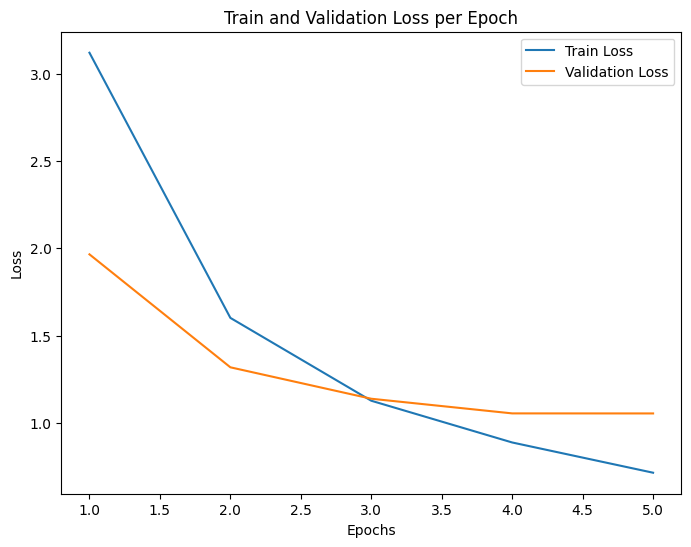

In [22]:
import matplotlib.pyplot as plt

def plot_losses(train_losses, val_losses):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.title('Train and Validation Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_losses(train_losses, val_losses)


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, test_loader, device):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=-1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions, average='weighted')  # Используем average='weighted'
    recall = recall_score(all_labels, all_predictions, average='weighted')        # Используем average='weighted'
    f1 = f1_score(all_labels, all_predictions, average='weighted')                # Используем average='weighted'

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')

evaluate_model(model, test_loader, device)


Accuracy: 0.7010
Precision: 0.7114
Recall: 0.7010
F1-score: 0.6928


In [27]:
torch.save(model.state_dict(), 'model_state_dict')

In [28]:
test_data = pd.read_csv('dataset/test_data_0_406.csv')

In [29]:
test_data.head

,Unnamed: 0,id,name,description,class,clean_description
0,0,14084,Менеджер по продажам смазочных материалов,<p><em><strong>Казахстанская</strong><strong> ...,0,казахстанская топливная компания специализируе...
1,1,14098,Менеджер по продажам,<p>ТОО АВИАПРОМСТАЛЬ - один из крупнейших пост...,0,тоо авиапромсталь крупнейших поставщиков черно...
2,2,14103,Менеджер по развитию сети (электроника),<p><strong>Возглавьте</strong> команду продаж ...,0,возглавьте команду продаж крупнейшего производ...
3,3,14104,Супервайзер альтернативного канала продаж (МТС),<strong>Обязанности:</strong> <ul> <li>Основна...,0,обязанности основная работа связана обучением ...
4,4,14111,Супервайзер отдела доставки,<p><strong>Обязанности:</strong></p> <ul> <li>...,0,обязанности старший супервайзер доставке серви...


In [30]:
from tqdm import tqdm
import torch
import torch.nn.functional as F
import pandas as pd


def tokenize_descriptions(descriptions, tokenizer, max_length=512):
    return tokenizer(descriptions.tolist(), padding='max_length', truncation=True, max_length=max_length, return_tensors="pt")

encodings = tokenize_descriptions(test_data['clean_description'], tokenizer)

class DescriptionDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        return item

    def __len__(self):
        return len(self.encodings['input_ids'])

description_dataset = DescriptionDataset(encodings)
description_loader = DataLoader(description_dataset, batch_size=16, shuffle=False)

def predict(model, data_loader, device):
    model.eval()
    predictions = []
    probabilities = []
    
    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Предсказания"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            
            probs = F.softmax(logits, dim=-1)
            
            predicted_classes = torch.argmax(probs, dim=-1)
            
            predictions.extend(predicted_classes.cpu().numpy())
            probabilities.extend(probs.cpu().numpy())
    
    return predictions, probabilities

predicted_classes, predicted_probabilities = predict(model, description_loader, device)

test_data['predicted_class'] = predicted_classes
test_data['predicted_probability'] = [max(prob) for prob in predicted_probabilities]


Предсказания: 100%|██████████| 4343/4343 [32:09<00:00,  2.25it/s]


In [36]:
sample = test_data.groupby(['predicted_class']).mean('predicted_probability')

In [39]:
sample.to_excel('dataset/res_of_testing_0_406.xlsx')